<h3>Generalización con POO: Clase ConBacktester</h3>
Ahora vamos a crear una clase para hacer backtest a una simple estrategia contraria. Esta clase se llama Conbacktester y su origen es el script Conbacktester.py que debe residir en la carpeta de trabajo.
A pesar de que hemos visto que las estrategias de momentum y contraria no son las estrategias más eficientes y por lo tanto no deberían usarse como las únicas estrategias en un proyecto.
Se va a crear una clase que tiene funcionalidades básicas únicamente.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")

In [8]:
df = pd.read_csv("intraday_pairs.csv", parse_dates = ["time"], index_col = ["time"])
df

,EURUSD,GBPUSD,EURAUD
time,,,
2018-01-01 22:00:00+00:00,1.201205,1.351705,1.533390
2018-01-02 04:00:00+00:00,1.207055,1.354830,1.540480
2018-01-02 10:00:00+00:00,1.204440,1.357860,1.537980
2018-01-02 16:00:00+00:00,1.205800,1.359180,1.540185
2018-01-02 22:00:00+00:00,1.204690,1.359530,1.542225
...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,1.311810,1.602420
2019-12-30 04:00:00+00:00,1.119940,1.311880,1.600800
2019-12-30 10:00:00+00:00,1.120095,1.311465,1.601165


El archivo csv de datos se ha leido en el dataframe df, contiene 3 instrumentos que son EURUSD, GPBUSD Y EURAUD (los 2 últimos libras/dolar y euro/dolar australiano). También la granularidad es de 6 horas y el período de tiempo va de 2018 a 2019.  

Nuevamente, esto es solo un ejemplo de una base de datos que contiene muchos instrumentos entonces en teoría uno también puede conectar la clase con un archivo csv de mayor tamaño o aún más se puede realizar una conexión con OANDA o con FXCM. 

In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075 entries, 2018-01-01 22:00:00+00:00 to 2019-12-30 22:00:00+00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EURUSD  2070 non-null   float64
 1   GBPUSD  2074 non-null   float64
 2   EURAUD  2071 non-null   float64
dtypes: float64(3)
memory usage: 64.8 KB


In [8]:
ptc = 0.00007

In [3]:
import ConBacktester as Con

In [4]:
tester = Con.ConBacktester("EURUSD", "2018-01-01", "2019-12-31", 0)

Aqui ConBactester es una clase para el backtesting vectorizado de estrategias contrarias simples, tester es una instancia de esa clase, a la cual se le deben pasar 4 argumentos: el instrumento, el inicio del período, el final del período y los costos de transacción o de trading.  

Esta clase tiene 3 métodos: get_data que carga y prepara los datos (de un archivo csv o de cualquier otra fuente), test_strategy que ejecuta la estrategia contraria y plot_results que grafica los resultados del backtesting y compara con la estrategia B/H.  

tester se crea para realizar un backtest de EURUSD desde el 2018 hasta el 2019 y además se le pasa un 0 para los costos de transacción (ningún costo de transacción)

In [5]:
tester.test_strategy(3)

(np.float64(1.101019), np.float64(0.171881))

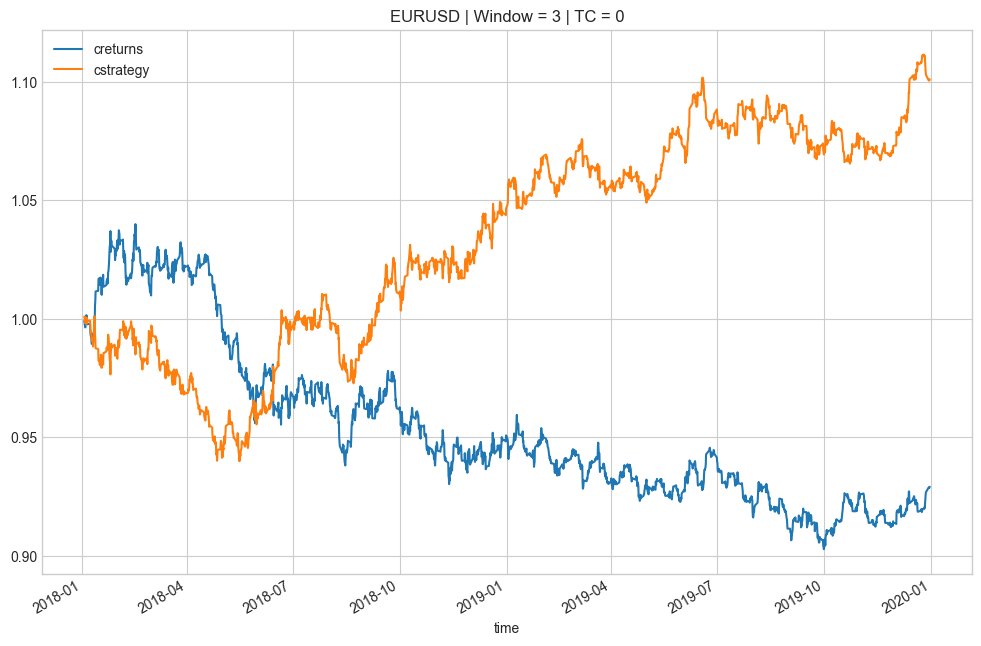

In [6]:
tester.plot_results()

In [ ]:
tester.results

,price,returns,position,strategy,trades,creturns,cstrategy
time,,,,,,,
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921,0.0,0.999079,1.000921
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718,0.0,0.998362,1.000203
2018-01-03 10:00:00+00:00,1.202355,-0.001222,1.0,-0.001222,0.0,0.997143,0.998981
2018-01-03 16:00:00+00:00,1.201445,-0.000757,1.0,-0.000757,0.0,0.996388,0.998225
2018-01-03 22:00:00+00:00,1.201450,0.000004,1.0,0.000004,0.0,0.996392,0.998229
...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0,-0.002092,0.0,0.928778,1.100591
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0,-0.000018,0.0,0.928794,1.100572
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0,-0.000138,0.0,0.928923,1.100420


In [9]:
# repeir  los cálculos con ptc no cero
tester = Con.ConBacktester("EURUSD", "2018-01-01", "2019-12-31", ptc)

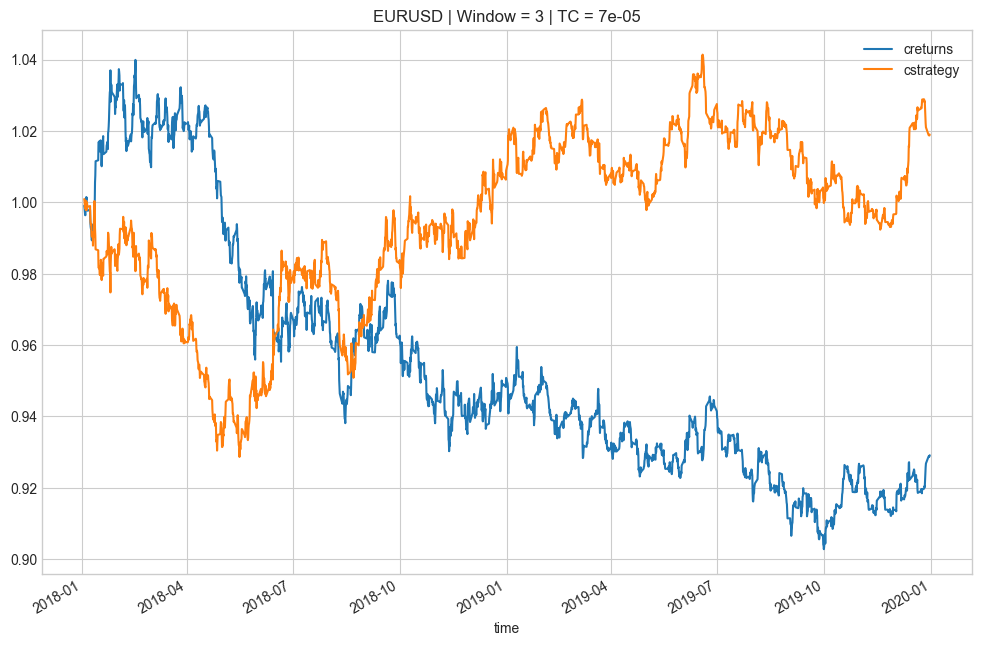

In [10]:
tester.test_strategy(3)
tester.plot_results()

In [11]:
tester.results

,price,returns,position,strategy,trades,creturns,cstrategy
time,,,,,,,
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921,0.0,0.999079,1.000921
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718,0.0,0.998362,1.000203
2018-01-03 10:00:00+00:00,1.202355,-0.001222,1.0,-0.001222,0.0,0.997143,0.998981
2018-01-03 16:00:00+00:00,1.201445,-0.000757,1.0,-0.000757,0.0,0.996388,0.998225
2018-01-03 22:00:00+00:00,1.201450,0.000004,1.0,0.000004,0.0,0.996392,0.998229
...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0,-0.002092,0.0,0.928778,1.018884
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0,-0.000018,0.0,0.928794,1.018866
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0,-0.000138,0.0,0.928923,1.018725


Si comparamos la gráfica con ptc = 0 con esta (ptc = 0.00007) vemos que el precio de un dolar en la esrtrategia contraria finaliza en 1.02 a diferencia de la gráfica anterior donde finaliza en 1.10. A continuación vamos a variar el parámetro ventana

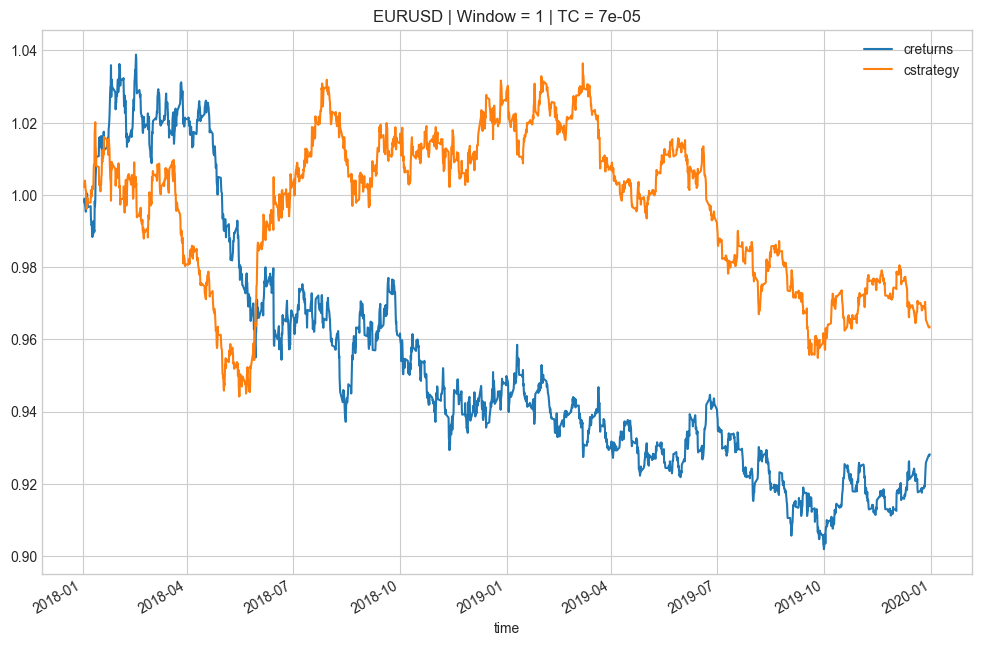

In [12]:
tester.test_strategy(1)
tester.plot_results()

In [13]:
tester.results

,price,returns,position,strategy,trades,creturns,cstrategy
time,,,,,,,
2018-01-02 10:00:00+00:00,1.204440,-0.002169,1.0,0.002169,0.0,0.997834,1.002171
2018-01-02 16:00:00+00:00,1.205800,0.001129,-1.0,0.000989,2.0,0.998960,1.003162
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000781,2.0,0.998041,1.003946
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718,0.0,0.997324,1.003225
2018-01-03 10:00:00+00:00,1.202355,-0.001222,1.0,-0.001222,0.0,0.996106,1.002000
...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0,-0.002092,0.0,0.927812,0.963413
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0,-0.000018,0.0,0.927828,0.963396
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0,-0.000138,0.0,0.927957,0.963262


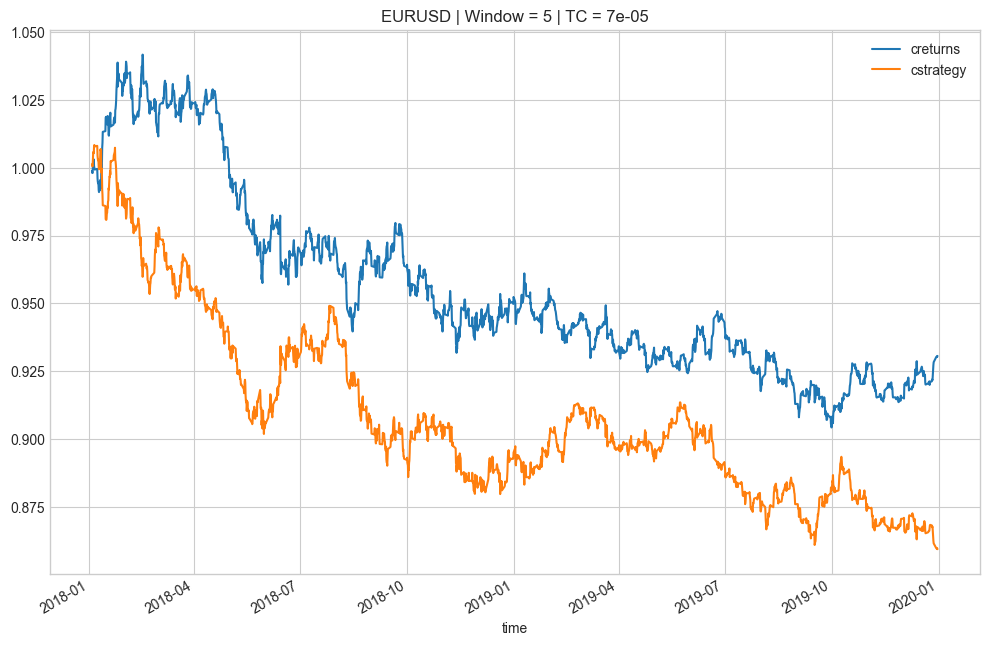

In [14]:
tester.test_strategy(5)
tester.plot_results()

En la gráfica anterior se observa que con una ventana de 5 la estraegia contraria es peor que la estrategia B/H.